In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tfs
from tensorflow import keras

df = pd.read_csv(r"abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [7]:
df['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


Text(0, 0.5, 'Count')

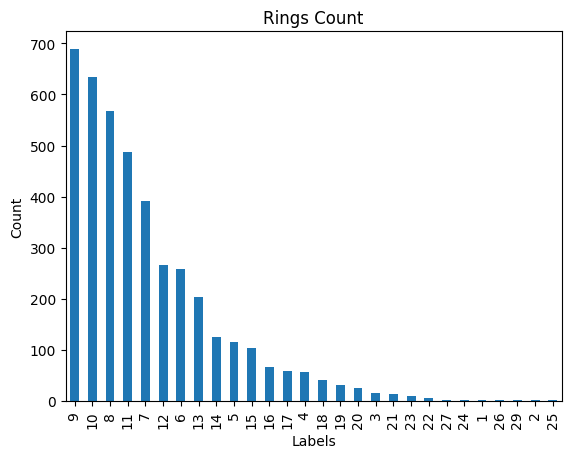

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Rings Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [9]:
df_Rings = df.loc[:, df.columns != 'Rings']

In [10]:
df_Rings

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'activity' 컬럼을 숫자로 변환
df_Rings.loc[:, 'Sex'] = label_encoder.fit_transform(df_Rings['Sex'])

In [12]:
df_Rings

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [13]:
df_Rings_Y=df['Rings']
df_Rings_Y.head()

,Rings
id,
0,15
1,7
2,9
3,10
4,7


In [14]:
df_Rings_X=df_Rings
df_Rings_X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [15]:
from sklearn.model_selection import train_test_split

X_train_Rings, X_test_Rings, y_train_Rings, y_test_Rings = train_test_split(df_Rings_X,
                                                    df_Rings_Y,
                                                    test_size = 0.25,
                                                    random_state = 21)

In [16]:
X_train_Rings.shape, X_test_Rings.shape, y_train_Rings.shape, y_test_Rings.shape

((3132, 8), (1045, 8), (3132,), (1045,))

In [17]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)

        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]

        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가

    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [18]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_Rings = np.array(y_train_Rings)
train_set_Rings = np.c_[X_train_Rings, y_train_array_Rings]

y_test_array_Rings = np.array(y_test_Rings)
test_set_Rings = np.c_[X_test_Rings, y_test_array_Rings]

In [19]:
n_step = 3

X_train_seq_Rings, y_train_seq_Rings = split_sequences(train_set_Rings, n_step)
print(X_train_seq_Rings.shape, y_train_seq_Rings.shape)

X_test_seq_Rings, y_test_seq_Rings = split_sequences(test_set_Rings, n_step)
print(X_test_seq_Rings.shape, y_test_seq_Rings.shape)

(3130, 3, 8) (3130,)
(1043, 3, 8) (1043,)


In [20]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_Rings = to_categorical(y_train_seq_Rings, num_classes=30)
print(y_train_seq_Rings.shape)

y_test_seq_Rings = to_categorical(y_test_seq_Rings)
print(y_test_seq_Rings.shape)

(3130, 30)
(1043, 30)


In [21]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_Rings.shape[1], X_train_seq_Rings.shape[2], y_train_seq_Rings.shape[1]
print(n_timesteps, n_features, n_outputs)

3 8 30


In [22]:
X_train_seq_Rings = X_train_seq_Rings.astype(np.float32)
y_train_seq_Rings = y_train_seq_Rings.astype(np.float32)
X_test_seq_Rings = X_test_seq_Rings.astype(np.float32)
y_test_seq_Rings = y_test_seq_Rings.astype(np.float32)

X_train_seq_Rings = np.array(X_train_seq_Rings)
y_train_seq_Rings = np.array(y_train_seq_Rings)
X_test_seq_Rings = np.array(X_test_seq_Rings)
y_test_seq_Rings = np.array(y_test_seq_Rings)




In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [24]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,526 (353.62 KB)

 Trainable params: 90,526 (353.62 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train_seq_Rings, y_train_seq_Rings, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1267 - loss: 2.9220 - val_accuracy: 0.1502 - val_loss: 2.4762
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1660 - loss: 2.4434 - val_accuracy: 0.2109 - val_loss: 2.3899
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1852 - loss: 2.3831 - val_accuracy: 0.2236 - val_loss: 2.2763
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2219 - loss: 2.2757 - val_accuracy: 0.1885 - val_loss: 2.2306
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2361 - loss: 2.2099 - val_accuracy: 0.2077 - val_loss: 2.1827
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2259 - loss: 2.2368 - val_accuracy: 0.2141 - val_loss: 2.1829
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2168 - loss: 2.1818 - val_accuracy: 0.2428 - val_loss: 2.1515
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2283 - loss: 2.1986 - val_accuracy: 0.2460 - val_loss

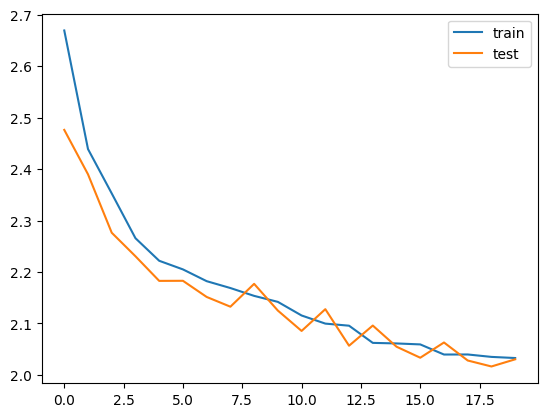

In [27]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [28]:
model.evaluate(X_train_seq_Rings, y_train_seq_Rings)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 2.0195


[2.0139951705932617, 0.2626197934150696]

In [29]:
model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2808 - loss: 2.1231


[2.0770277976989746, 0.2665388286113739]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Confusion Matrix


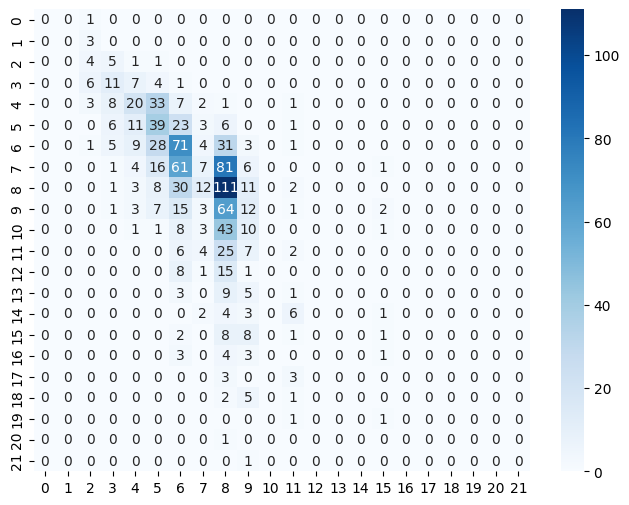

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_Rings, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_Rings),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [34]:
base_loss,base_accuracy=model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

model_file=r"C:\Users\tonyd\OneDrive\바탕 화면\4-2\딥러닝 응용\data\Rings_Model.keras"

tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2808 - loss: 2.1231
model saved at  C:\Users\tonyd\OneDrive\바탕 화면\4-2\딥러닝 응용\data\Rings_Model.keras
Accuracy >26.653883
Base Loss >2.08


Pre-trained model

In [37]:

# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(r"C:\Users\tonyd\OneDrive\바탕 화면\4-2\딥러닝 응용\data\Rings_Model.keras")

In [40]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2808 - loss: 2.1231


[2.0770277976989746, 0.2665388286113739]

In [42]:
base_model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2808 - loss: 2.1231


[2.0770277976989746, 0.2665388286113739]

In [43]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [44]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [52]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(30, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,656 (338.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 86,656 (338.50 KB)

In [53]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,False
1,"<Dense name=dense, built=True>",dense,False
2,"<Dense name=dense_6, built=False>",dense_6,True
3,"<Dense name=dense_7, built=False>",dense_7,True


In [54]:
history3 = new_model.fit(X_train_seq_Rings, y_train_seq_Rings, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1798 - loss: 2.5334 - val_accuracy: 0.2236 - val_loss: 2.1006
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2287 - loss: 2.1063 - val_accuracy: 0.2396 - val_loss: 2.0605
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2203 - loss: 2.0882 - val_accuracy: 0.2141 - val_loss: 2.0483
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2420 - loss: 2.0450 - val_accuracy: 0.2396 - val_loss: 2.0064
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2442 - loss: 2.0653 - val_accuracy: 0.2524 - val_loss: 2.0279
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2520 - loss: 2.0834 - val_accuracy: 0.2236 - val_loss: 2.0421
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2697 - loss: 2.0375 - val_accuracy: 0.2460 - val_loss: 2.0150
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2602 - loss: 2.0345 - val_accuracy: 0.2396 - val_loss:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           7,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,860 (815.86 KB)

 Trainable params: 40,734 (159.12 KB)

 Non-trainable params: 86,656 (338.50 KB)

 Optimizer params: 81,470 (318.25 KB)

In [55]:
new_model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2502 - loss: 2.1108


[2.072054862976074, 0.24352827668190002]

Fine Tunning 미세조정

In [56]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [57]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense, built=True>",dense,True
2,"<Dense name=dense_6, built=True>",dense_6,True
3,"<Dense name=dense_7, built=True>",dense_7,True


In [58]:
history3 = new_model.fit(X_train_seq_Rings, y_train_seq_Rings, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2440 - loss: 2.0226 - val_accuracy: 0.2396 - val_loss: 2.0296
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2645 - loss: 1.9877 - val_accuracy: 0.2556 - val_loss: 2.0426
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2578 - loss: 2.0287 - val_accuracy: 0.2748 - val_loss: 2.0195
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2649 - loss: 1.9741 - val_accuracy: 0.2364 - val_loss: 2.0594
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2442 - loss: 2.0490 - val_accuracy: 0.2524 - val_loss: 2.0404
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2687 - loss: 2.0151 - val_accuracy: 0.2236 - val_loss: 2.0323
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2588 - loss: 1.9896 - val_accuracy: 0.2652 - val_loss: 2.0119
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2564 - loss: 1.9853 - val_accuracy: 0.2652 - val_l

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           7,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 382,172 (1.46 MB)

 Trainable params: 127,390 (497.62 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 254,782 (995.25 KB)

In [59]:
new_model.evaluate(X_test_seq_Rings, y_test_seq_Rings)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2593 - loss: 2.1032


[2.0552918910980225, 0.25311601161956787]